# Ground-roll attenuation datasets

## Content
* [Dataset 1](#Dataset-1)

## Dataset 1

Dataset includes train and validation parts.

**Train** part is given by 2 SEGY files:
* ```DN02A_LIFT_AMPSCAL.sgy``` contains a raw seismogram
* ```DN02B_SHOTS_LIFT1.sgy``` contains a seismogram after ground-roll attenuation. 

Train seismorgam includes 176K traces combined in 51 field records. Sampling rate is 2ms, 3000 samples for each trace.

**Validation** part in given by SEGY file ```DN02B_SHOTS_LIFT1_VALIDATION.sgy```. It includes another 1M traces in 300 field records non-overlapping with the train part. Sampling rate is 2ms, 3000 samples for each trace.

Below we show sample trace headers and sample seismogram from the train dataset.

Index field records in both train files and output basic attributes of the 5 first traces:

In [1]:
import sys
sys.path.append('..')

from geolog.batchflow import Dataset
from geolog.src import SeismicBatch, SegyFilesIndex, FieldIndex, TraceIndex

path_raw = '/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy'
path_lift = '/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy'

field_index = (FieldIndex(name='raw', path=path_raw).
               merge(FieldIndex(name='lift', path=path_lift)))

field_index.head()

,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,raw,raw,lift,lift
FieldRecord,,,,,
111906,1656,1,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy
111906,1657,2,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,2,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy
111906,1655,3,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,3,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy
111906,1658,4,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,4,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy
111906,1654,5,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,5,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy


Total number of field records and traces:

In [2]:
len(field_index), field_index.tracecount

(51, 175962)

Sample seismogram and power spectrum of a ground-roll region:

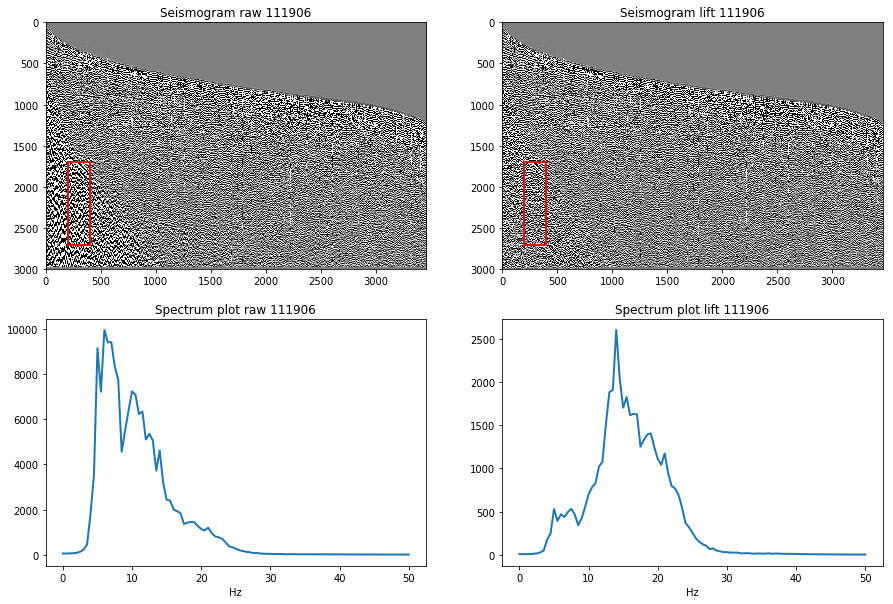

In [3]:
batch = (Dataset(field_index, SeismicBatch).next_batch(1)
         .load(fmt='segy', components=('raw', 'lift')))

cv = 0.1
batch.spectrum_plot(('raw', 'lift'), batch.indices[0],
                    frame=(slice(200, 400), slice(1700, 2700)),
                    rate=0.002, max_freq=50,
                    figsize=(15, 10), vmin=-cv, vmax=cv, cmap='gray')

Same seismogram and power spectrum of a region without ground-rolls:

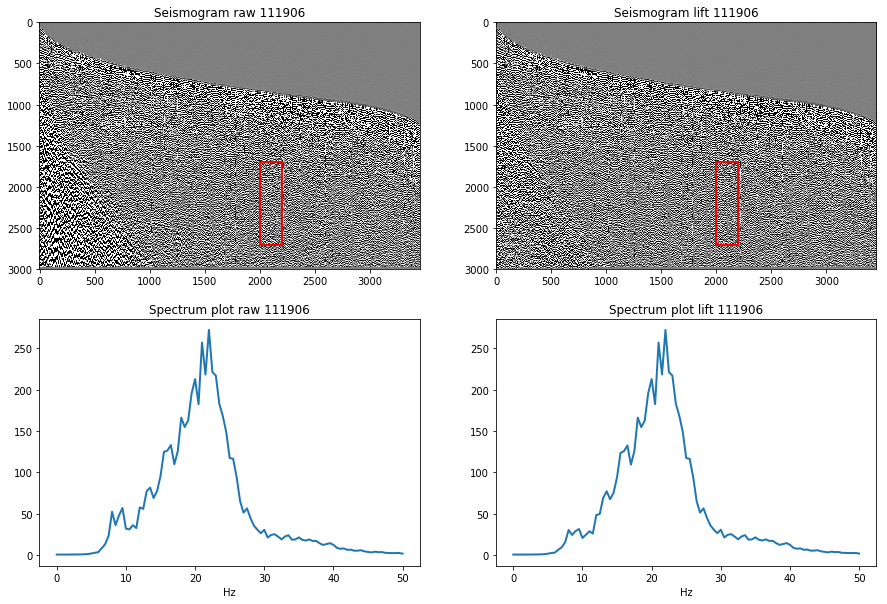

In [4]:
batch.spectrum_plot(('raw', 'lift'), batch.indices[0],
                    frame=(slice(2000, 2200), slice(1700, 2700)),
                    rate=0.002, max_freq=50,
                    figsize=(15, 10), vmin=-cv, vmax=cv, cmap='gray')